## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing all datasets
churn_data = pd.read_csv(r"churn_data.csv")
customer_data = pd.read_csv(r"customer_data.csv")
internet_data = pd.read_csv(r"internet_data.csv")

In [6]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [8]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [9]:
#Merging on 'customerID'
churn_customer_data = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [10]:
churn_customer_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [11]:
#Final dataframe with all predictor variables
telecom = pd.merge(churn_customer_data, internet_data, how='inner', on='customerID')

In [12]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [13]:
telecom.shape

(7043, 21)

In [14]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [15]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Data Visualization

<AxesSubplot:>

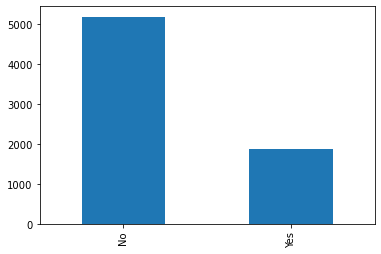

In [16]:
telecom['Churn'].value_counts().plot.bar()

<AxesSubplot:xlabel='PhoneService'>

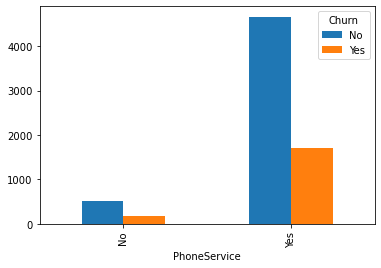

In [17]:
pd.crosstab(telecom.PhoneService,telecom.Churn).plot.bar()

<AxesSubplot:xlabel='PaperlessBilling'>

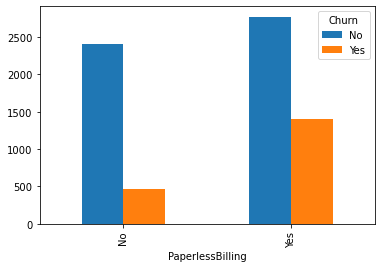

In [18]:
pd.crosstab(telecom.PaperlessBilling,telecom.Churn).plot.bar()

<AxesSubplot:xlabel='Partner'>

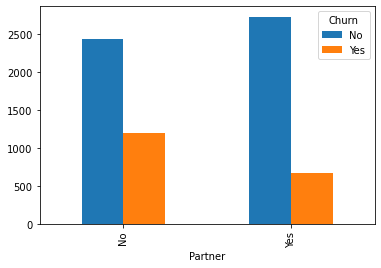

In [19]:
pd.crosstab(telecom.Partner,telecom.Churn).plot.bar()

<AxesSubplot:xlabel='Dependents'>

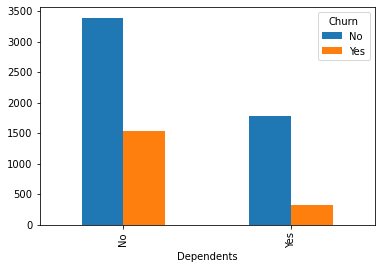

In [20]:
pd.crosstab(telecom.Dependents,telecom.Churn).plot.bar()

<AxesSubplot:xlabel='Contract'>

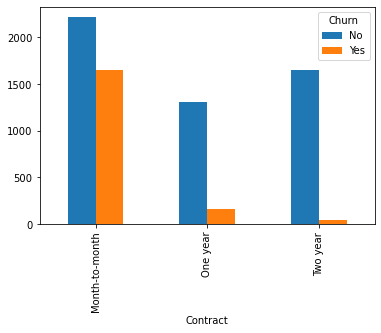

In [21]:
pd.crosstab(telecom.Contract,telecom.Churn).plot.bar()

<AxesSubplot:xlabel='gender'>

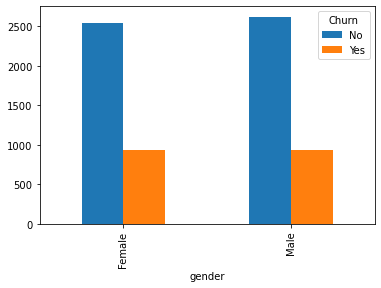

In [22]:
pd.crosstab(telecom.gender,telecom.Churn).plot.bar()

### Data Preparation

In [23]:
# Converting Yes to 1 and No to 0
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes': 1, 'No': 0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes': 1, 'No': 0})
telecom['Churn'] = telecom['Churn'].map({'Yes': 1, 'No': 0})
telecom['Partner'] = telecom['Partner'].map({'Yes': 1, 'No': 0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes': 1, 'No': 0})
telecom['gender'] = telecom['gender'].map({'Male': 1, 'Female': 0})

In [24]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,1,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,1,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [25]:
telecom['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [28]:
#a = pd.get_dummies(telecom).head()

In [29]:
#a.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'Churn',
       'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract_One year',
       ...
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes'],
      dtype='object', length=13635)

In [610]:
#pd.get_dummies(telecom['Contract'],drop_first=True).head()

### Dummy Variable Creation

In [26]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont = pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,cont],axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,pm],axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
#  dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1],axis=1)

# Creating a dummy variable for the variable 'InternetService' and dropping the first one.
iser = pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,iser],axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os1= os.drop(['OnlineSecurity_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,os1],axis=1)

# Creating a dummy variable for the variable 'OnlineBackup'.
ob =pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob1 =ob.drop(['OnlineBackup_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1],axis=1)

# Creating a dummy variable for the variable 'DeviceProtection'. 
dp =pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1],axis=1)

# Creating a dummy variable for the variable 'TechSupport'. 
ts =pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)

# Creating a dummy variable for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,st1],axis=1)

# Creating a dummy variable for the variable 'StreamingMovies'. 
sm =pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1],axis=1)

In [30]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,1,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,1,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,...,1,0,1,0,1,0,1,0,1,0


### Dropping the repeated variables

In [31]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [614]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [32]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] =pd.to_numeric(telecom['TotalCharges'],errors='coerce')

In [616]:
#b = pd.Series([12,45,67,89],dtype='float64')

In [617]:
#int(),float()

In [618]:
#b.astype('float64')

In [33]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

### Checking for Outliers

In [34]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [35]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


<AxesSubplot:xlabel='MonthlyCharges'>

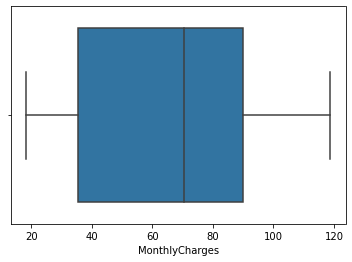

In [38]:
sns.boxplot(x=telecom.MonthlyCharges)

<AxesSubplot:xlabel='tenure'>

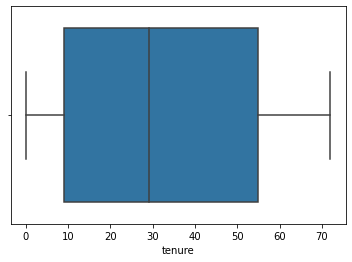

In [39]:
sns.boxplot(x=telecom.tenure)

<AxesSubplot:xlabel='TotalCharges'>

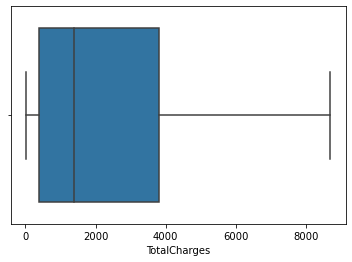

In [40]:
sns.boxplot(x=telecom.TotalCharges)

From the distribution shown above, you can see that there no outliner in your data. The numbers are gradually increasing.

### Checking for Missing Values and Inputing Them

In [41]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
MultipleLines_No                          0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                           0
OnlineBackup_Yes                

In [42]:
telecom[telecom.TotalCharges.isnull()]

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
488,4472-LVYGI,0,0,1,52.55,NaN,0,0,1,1,...,1,0,0,1,0,1,0,1,1,0
753,3115-CZMZD,0,1,0,20.25,NaN,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
936,5709-LVOEQ,0,1,0,80.85,NaN,0,0,1,1,...,0,1,0,1,1,0,0,1,0,1
1082,4367-NUYAO,0,1,0,25.75,NaN,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1340,1371-DWPAZ,0,0,0,56.05,NaN,0,0,1,1,...,0,1,0,1,0,1,0,1,1,0
3331,7644-OMVMY,0,1,0,19.85,NaN,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3826,3213-VVOLG,0,1,0,25.35,NaN,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4380,2520-SGTTA,0,1,0,20.00,NaN,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5218,2923-ARZLG,0,1,1,19.70,NaN,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6670,4075-WKNIU,0,1,0,73.35,NaN,0,0,1,1,...,0,1,0,1,0,1,0,1,1,0


It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [43]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/telecom.shape[0]), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                       0.00
OnlineBackup_No                   

In [44]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [629]:
# Try to impute with mean or median

In [45]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/telecom.shape[0]), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBackup_No                          0.0
OnlineBack

Now we don't have any missing values

In [47]:
df.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


### Feature Standardisation

In [46]:
# Normalising continuous features
df = telecom[['tenure','MonthlyCharges','TotalCharges']]

In [632]:
#df

In [633]:
#from sklearn.preprocessing import StandardScaler

In [634]:
#Use Standard Scaler

In [49]:
standardized_df=(df-df.mean())/df.std()

In [50]:
standardized_df.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.280157,-1.161611,-0.994123
1,0.064298,-0.260859,-0.173727
2,-1.239416,-0.363897,-0.959581
3,0.512450,-0.747797,-0.195234
4,-1.239416,0.196164,-0.940391


In [51]:
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'], 1)

In [52]:
telecom = pd.concat([telecom,standardized_df],axis=1)

In [53]:
telecom.head()

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.280157,-1.161611,-0.994123
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,0,0.064298,-0.260859,-0.173727
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,-0.363897,-0.959581
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,1,0,0.512450,-0.747797,-0.195234
4,9237-HQITU,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,0.196164,-0.940391


In [58]:
#telecom.PaperlessBilling.mean()

0.5927189988623436

In [59]:
#telecom.PaperlessBilling.std()

0.4913629222564994

In [642]:
#(1-0.59)/(0.49)

## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# Putting feature variable to X
x = telecom.drop(['Churn','customerID'],axis=1)
# Putting response variable to y
y = telecom['Churn']

In [62]:
x.shape

(7032, 29)

In [63]:
y.shape

(7032,)

In [64]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [66]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pre = lr.predict(x_test)

In [67]:
accuracy_score(y_test,pre)

0.7976303317535545

In [69]:
a = confusion_matrix(y_test,pre)

In [70]:
print(a)

[[1354  174]
 [ 253  329]]


In [71]:
(1354+329)/(1354+329+174+253)

0.7976303317535545

In [654]:
#Precision = Among all predicted positive values how many are our model predicted correctly

In [655]:
#p = TP/TP+FP

In [72]:
p = 328/(328+174)

In [73]:
p

0.6533864541832669

In [658]:
#Sensitivity or Recall or TPR = TP/TP+FN

In [659]:
#Recall:Among all positive values how many are identified correctly

In [74]:
328/(328+254)

0.563573883161512

In [661]:
#f1 score = 2*P*R/P+R = 2*0.65*0.56/(0.56+0.65)

In [75]:
tn,fp,fn,tp = a.ravel()

In [76]:
fp

174

In [77]:
tn

1354

In [78]:
tp

329

In [79]:
fn

253

In [667]:
#Accuracy = TP+TN/(TP+TN+FP+FN)

In [80]:
classification_report(y_test,pre)

'              precision    recall  f1-score   support\n\n           0       0.84      0.89      0.86      1528\n           1       0.65      0.57      0.61       582\n\n    accuracy                           0.80      2110\n   macro avg       0.75      0.73      0.74      2110\nweighted avg       0.79      0.80      0.79      2110\n'

In [81]:
confusion_matrix(y_test,pre)

array([[1354,  174],
       [ 253,  329]], dtype=int64)

In [87]:
from sklearn import metrics
from sklearn.metrics import classification_report

import matplotlib.pylab as plt
import seaborn as sn
%matplotlib inline 

In [103]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Churn", "Not Churn"] , yticklabels = ["Churn", "Not Churn"] )
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.show()

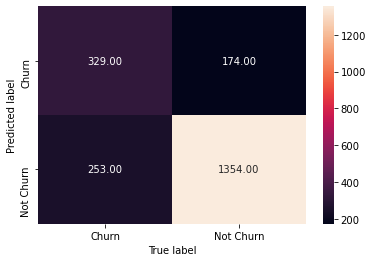

In [104]:
draw_cm(pre,  y_test)

In [89]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, pre ), 2 ) )

Total Accuracy :  0.8


In [90]:
print( 'Precision : ',np.round( metrics.precision_score( y_test, pre), 2 ) )

Precision :  0.65


In [91]:
print( 'Recall : ',np.round( metrics.recall_score( y_test, pre ), 2 ) )

Recall :  0.57


In [93]:
cm1 = metrics.confusion_matrix( y_test, pre, [1,0] )

In [94]:
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])

In [95]:
print('Sensitivity : ', round( sensitivity, 2) )

Sensitivity :  0.57


In [96]:
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])

In [97]:
print('Specificity : ', round( specificity, 2 ) )

Specificity :  0.89


In [670]:
#TNR or Specificity = TN/TN+FP

In [671]:
#FPR or (1-Specifity) = FP/FP+TN <-LOW

In [672]:
#FNR = FN/FN+TP <_LOw

In [673]:
#TPR and TNR <-High

## Running Your First Training Model

In [105]:
import statsmodels.api as sm

In [118]:
print(x_train.shape,x_test.shape)

(4922, 29) (2110, 29)


In [120]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial()).fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4899
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.8
Date:                Tue, 23 Feb 2021   Deviance:                       4009.6
Time:                        21:48:44   Pearson chi2:                 6.06e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2906      1.188     -2.769      0.006      -5.619      -0.962
PhoneService                              0.8220      0.589      1.396      0.163      -0.332       1.976
PaperlessBilling                          0.3257      0.090      3.617      0.000       0.149       0.502
SeniorCitizen                             0.3986      0.102      3.925      0.000       0.200       0.598
Partner                                   0.0372      0.094      0.397      0.692      -0.147       0.221
Dependents                               -0.1427      0.107     -1.329      0.184      -0.353       0.068
Contract_One year                        -0.6574      0.129     -5.104      0.000      -0.910      -0.405
Contract_Two year                        -1.2456      0.212     -5.871      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2581      0.137     -1.884      0.060      -0.527       0.010
PaymentMethod_Electronic check            0.1608      0.113      1.427      0.154      -0.060       0.382
PaymentMethod_Mailed check               -0.2548      0.137     -1.854      0.064      -0.524       0.015
MultipleLines_No                          0.1298      0.205      0.633      0.527      -0.272       0.532
MultipleLines_Yes                         0.6922      0.393      1.762      0.078      -0.078       1.462
InternetService_Fiber optic               2.5159      0.968      2.599      0.009       0.619       4.413
InternetService_No                       -3.4452      1.326     -2.599      0.009      -6.044      -0.847
OnlineSecurity_No                         0.0885      0.058      1.526      0.127      -0.025       0.202
OnlineSecurity_Yes                        0.0661      0.174      0.380      0.704      -0.275       0.407
OnlineBackup_No                          -0.0104      0.054     -0.192      0.848      -0.117       0.096
OnlineBackup_Yes                          0.1650      0.172      0.957      0.338      -0.173       0.503
DeviceProtection_No                      -0.0842      0.056     -1.505      0.132      -0.194       0.025
DeviceProtection_Yes                      0.2388      0.174      1.372      0.170      -0.102       0.580
TechSupport_No                            0.0921      0.058      1.580      0.114      -0.022       0.206
TechSupport_Yes                           0.0625      0.174      0.359      0.720      -0.279       0.404
StreamingTV_No                           -0.4031      0.133     -3.036      0.002      -0.663      -0.143
StreamingTV_Yes                           0.5577      0.267      2.090      0.037       0.035       1.081
StreamingMovies_No                       -0.3474      0.133     -2.618      0.009      -0.608      -0.087
Streaming

In [677]:
#x_test = sm.add_constant(x_test)
#pre_glm1 = logm1.predict(x_test)
#pre_glm1 = pre4.map(lambda x:1 if x>0.5 else 0)
#print(confusion_matrix(y_test,pre_glm1))
#print(accuracy_score(y_test,pre_glm1))

In [121]:
print(x_train.shape,x_test.shape)

(4922, 29) (2110, 29)


### Correlation Matrix

<AxesSubplot:>

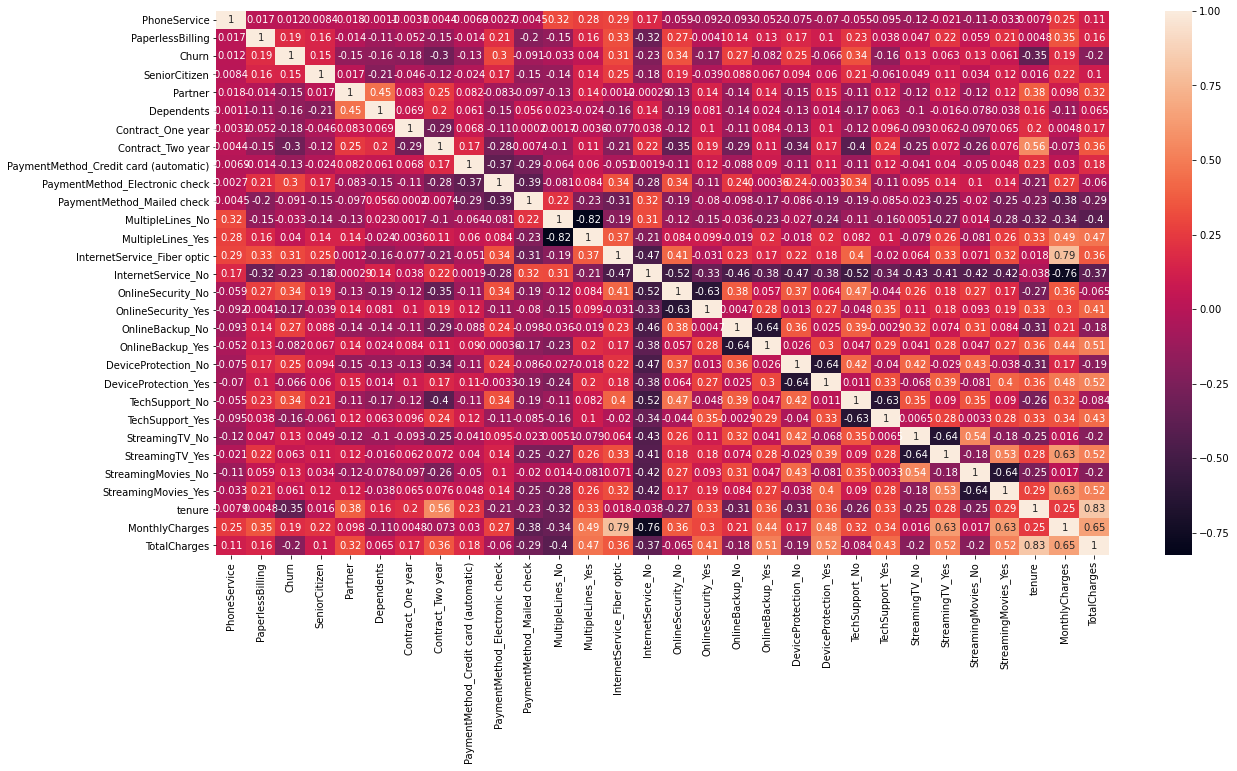

In [122]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)

In [680]:
#Internet_Service_FiberOptic and Monthly Charges

### Dropping highly correlated variables.

In [123]:
x_test2 = x_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)
x_train2 = x_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)

In [124]:
x_test2.shape

(2110, 22)

In [125]:
x_train2.shape

(4922, 22)

In [126]:
lr = LogisticRegression()
lr.fit(x_train2,y_train)
pre1 = lr.predict(x_test2)

In [127]:
accuracy_score(y_test,pre1)

0.7981042654028436

In [128]:
confusion_matrix(y_test,pre1)

array([[1355,  173],
       [ 253,  329]], dtype=int64)

In [129]:
classification_report(y_test,pre1)

'              precision    recall  f1-score   support\n\n           0       0.84      0.89      0.86      1528\n           1       0.66      0.57      0.61       582\n\n    accuracy                           0.80      2110\n   macro avg       0.75      0.73      0.74      2110\nweighted avg       0.79      0.80      0.79      2110\n'

### Re-Running the Model

Now let's run our model again after dropping highly correlated variables

In [130]:
logm2 = sm.GLM(y_train,(sm.add_constant(x_train2)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4899
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.8
Date:                Tue, 23 Feb 2021   Deviance:                       4009.6
Time:                        21:50:40   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9555      1.545     -2.561      0.010      -6.983      -0.928
PhoneService                              0.9519      0.789      1.207      0.227      -0.594       2.498
PaperlessBilling                          0.3258      0.090      3.618      0.000       0.149       0.502
SeniorCitizen                             0.3987      0.102      3.927      0.000       0.200       0.598
Partner                                   0.0372      0.094      0.397      0.691      -0.146       0.221
Dependents                               -0.1428      0.107     -1.331      0.183      -0.353       0.068
Contract_One year                        -0.6575      0.129     -5.104      0.000      -0.910      -0.405
Contract_Two year                        -1.2456      0.212     -5.875      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2582      0.137     -1.887      0.059      -0.526       0.010
PaymentMethod_Electronic check            0.1608      0.113      1.428      0.153      -0.060       0.381
PaymentMethod_Mailed check               -0.2549      0.137     -1.855      0.064      -0.524       0.014
MultipleLines_Yes                         0.5624      0.214      2.629      0.009       0.143       0.982
InternetService_Fiber optic               2.5162      0.967      2.603      0.009       0.622       4.411
InternetService_No                       -2.7808      0.981     -2.833      0.005      -4.704      -0.857
OnlineSecurity_Yes                       -0.0224      0.216     -0.104      0.917      -0.446       0.401
OnlineBackup_Yes                          0.1754      0.212      0.829      0.407      -0.239       0.590
DeviceProtection_Yes                      0.3230      0.215      1.502      0.133      -0.098       0.744
TechSupport_Yes                          -0.0299      0.216     -0.138      0.890      -0.454       0.394
StreamingTV_Yes                           0.9609      0.396      2.426      0.015       0.185       1.737
StreamingMovies_Yes                       0.8496      0.396      2.146      0.032       0.074       1.625
tenure                                   -1.5200      0.190     -8.017      0.000      -1.892      -1.148
MonthlyCharges                           -2.1846      1.160     -1.883      0.060      -4.459       0.089
TotalCharges                              0.7322      0.198      3.702      0.000       0.345       1.120
=========================================================================================================
"""

### Feature Selection Using RFE

In [141]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(x,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

C:\Users\Priyanka\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=13 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Priyanka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[False  True False False False  True  True False  True False  True False
  True  True  True False False False False False False False False  True
 False  True  True  True  True]
[ 5  1  3 17  4  1  1 11  1 12  1 16  1  1  1  7  6 15  9 10  2  8 14  1
 13  1  1  1  1]


In [690]:
# Try with 20 features and Try with 10 features

In [142]:
# Variables selected by RFE 
col = ['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [143]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(x_train[col], y_train)

LogisticRegression()

In [144]:
pre5 = logsk.predict(x_test[col])
confusion_matrix(pre5,y_test)

array([[1360,  256],
       [ 168,  326]], dtype=int64)

In [145]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(x_train[col])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2024.2
Date:                Tue, 23 Feb 2021   Deviance:                       4048.4
Time:                        22:09:17   Pearson chi2:                 6.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.0162      0.169     -6.017      0.000      -1.347      -0.685
PhoneService                      -0.3090      0.173     -1.784      0.074      -0.648       0.030
PaperlessBilling                   0.3595      0.089      4.029      0.000       0.185       0.534
Contract_One year                 -0.7012      0.127     -5.516      0.000      -0.950      -0.452
Contract_Two year                 -1.3187      0.210     -6.271      0.000      -1.731      -0.907
PaymentMethod_Electronic check     0.3668      0.083      4.446      0.000       0.205       0.529
MultipleLines_No                  -0.2311      0.095     -2.435      0.015      -0.417      -0.045
InternetService_Fiber optic        0.7937      0.116      6.836      0.000       0.566       1.021
InternetService_No                -1.1832      0.182     -6.484      0.000      -1.541      -0.826
OnlineSecurity_Yes                -0.4107      0.102     -4.031      0.000      -0.610      -0.211
TechSupport_Yes                   -0.4181      0.101     -4.135      0.000      -0.616      -0.220
StreamingMovies_No                -0.2024      0.094     -2.160      0.031      -0.386      -0.019
tenure                            -1.4974      0.181     -8.251      0.000      -1.853      -1.142
TotalCharges                       0.7373      0.186      3.965      0.000       0.373       1.102
==================================================================================================
"""

In [146]:
telecom

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.280157,-1.161611,-0.994123
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,0,0.064298,-0.260859,-0.173727
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,-0.363897,-0.959581
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,1,0,0.512450,-0.747797,-0.195234
4,9237-HQITU,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.239416,0.196164,-0.940391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,1,0,0,1,1,1,0,0,...,1,0,1,0,1,0,1,-0.343113,0.664821,-0.129171
7039,2234-XADUH,1,1,0,0,1,1,1,0,1,...,1,1,0,0,1,0,1,1.612459,1.276402,2.240896
7040,4801-JZAZL,0,1,0,0,1,1,0,0,0,...,0,1,0,1,0,1,0,-0.872746,-1.169921,-0.854453
7041,8361-LTMKD,1,1,1,1,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.157934,0.319145,-0.872033


In [147]:
needed_columns=['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges','Churn']

In [148]:
telecom1 = telecom[needed_columns]

In [149]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [150]:
telecom1.head()

,PhoneService,PaperlessBilling,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,MultipleLines_No,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,TechSupport_Yes,StreamingMovies_No,tenure,TotalCharges,Churn
0,0,1,0,0,1,0,0,0,0,0,1,-1.280157,-0.994123,0
1,1,0,1,0,0,1,0,0,1,0,1,0.064298,-0.173727,0
2,1,1,0,0,0,1,0,0,1,0,1,-1.239416,-0.959581,1
3,0,0,1,0,0,0,0,0,1,1,1,0.512450,-0.195234,0
4,1,1,0,0,1,1,1,0,0,0,1,-1.239416,-0.940391,1


In [151]:
# Calculating Vif value
vif_cal(input_data=telecom1,dependent_col='Churn')

,Var,Vif
0,PhoneService,10.87
12,TotalCharges,8.58
11,tenure,6.80
1,PaperlessBilling,2.61
7,InternetService_No,0.65
3,Contract_Two year,0.28
2,Contract_One year,0.24
9,TechSupport_Yes,0.24
8,OnlineSecurity_Yes,0.21
10,StreamingMovies_No,0.19


In [152]:
y = telecom1['Churn']
x = telecom1.drop('Churn',axis=1)

In [153]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [154]:
x_train = x_train.drop('PhoneService',axis=1)

In [155]:
x_test = x_test.drop('PhoneService',axis=1)

In [156]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(x_train, y_train)

LogisticRegression()

In [706]:
#pre7 = logsk.predict(x_test)

In [707]:
#pre7

In [708]:
#accuracy_score(pre7,y_test)

In [157]:
pre6 = logsk.predict_proba(x_test)

In [158]:
pre6

array([[0.50214009, 0.49785991],
       [0.62960905, 0.37039095],
       [0.99327714, 0.00672286],
       ...,
       [0.99621158, 0.00378842],
       [0.54267558, 0.45732442],
       [0.99759349, 0.00240651]])

In [159]:
pre6 = pd.DataFrame(pre6)

In [160]:
# Converting to column dataframe
pre6 = pre6.iloc[:,[1]]

In [161]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [715]:
y_test_df

,Churn,CustID
942,0,7567-ECMCM
3730,1,6771-XWBDM
1761,0,5356-KZCKT
2283,1,6140-QNRQQ
1872,0,9938-PRCVK
1970,1,5445-UTODQ
2532,0,9825-YCXWZ
1616,0,6518-PPLMZ
2485,1,9921-ZVRHG
5914,0,3099-OONVS


In [165]:
# Putting CustID to index
y_test_df['CustID'] = telecom.customerID

In [166]:
# Removing index for both dataframes to append them side by side 
pre6.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,pre6],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)

AttributeError: 'DataFrame' object has no attribute 'reindex_axis'

In [167]:
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,0,7590-VHVEG,0.497860
1,1,5575-GNVDE,0.370391
2,0,3668-QPYBK,0.006723
3,1,7795-CFOCW,0.636464
4,0,9237-HQITU,0.007508


In [168]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [169]:
y_pred_final.head()

,Churn,CustID,Churn_Prob,predicted
0,0,7590-VHVEG,0.497860,0
1,1,5575-GNVDE,0.370391,0
2,0,3668-QPYBK,0.006723,0
3,1,7795-CFOCW,0.636464,1
4,0,9237-HQITU,0.007508,0


In [170]:
confusion=confusion_matrix(y_pred_final.predicted,y_pred_final.Churn)

In [171]:
confusion

array([[1360,  249],
       [ 168,  333]], dtype=int64)

In [172]:
accuracy_score(y_pred_final.predicted,y_pred_final.Churn)

0.8023696682464455

In [724]:
#accuracy_score = TP+TN/TP+FP+TN+FN

In [725]:
#TPR or Recall or Sensitivity
#Precision

In [726]:
#P = TP/TP+FP

In [727]:
#R = TP/TP+FN

In [173]:
classification_report(y_pred_final.Churn,y_pred_final.predicted)

'              precision    recall  f1-score   support\n\n           0       0.85      0.89      0.87      1528\n           1       0.66      0.57      0.61       582\n\n    accuracy                           0.80      2110\n   macro avg       0.75      0.73      0.74      2110\nweighted avg       0.80      0.80      0.80      2110\n'

In [731]:
#Precision is the fraction of correctly predicted positives out of all predicted positives, i.e. 
#it measures 'out of all those the model has predicted to be positive, how many are correct'. 
#It differs from sensitivity only in the denominator.

In [732]:
#F1-score = 2*P*R/P+R

In [733]:
#ROC-AUC Curve

In [734]:
# ROC Curve
# An ROC curve demonstrates several things:

# It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
# The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
# The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [174]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = True )
    print(fpr)
    print(tpr)
    print(thresholds)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [745]:
#AUC=1

[0.         0.10994764 1.        ]
[0.         0.57216495 1.        ]
[2 1 0]


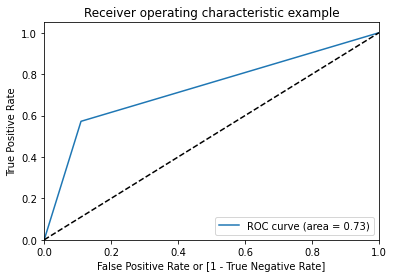

(array([0.        , 0.10994764, 1.        ]),
 array([0.        , 0.57216495, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [175]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

In [748]:
#Finding Optimal Cutoff Point
#Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [176]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,Churn,CustID,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,7590-VHVEG,0.497860,0,1,1,1,1,1,0,0,0,0,0
1,1,5575-GNVDE,0.370391,0,1,1,1,1,0,0,0,0,0,0
2,0,3668-QPYBK,0.006723,0,1,0,0,0,0,0,0,0,0,0
3,1,7795-CFOCW,0.636464,1,1,1,1,1,1,1,1,0,0,0
4,0,9237-HQITU,0.007508,0,1,0,0,0,0,0,0,0,0,0


In [177]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.275829  0.000000  1.000000
0.1   0.1  0.605687  0.477094  0.943299
0.2   0.2  0.695261  0.643979  0.829897
0.3   0.3  0.751659  0.754581  0.743986
0.4   0.4  0.783412  0.827880  0.666667
0.5   0.5  0.802370  0.890052  0.572165
0.6   0.6  0.794787  0.941754  0.408935
0.7   0.7  0.757820  0.979058  0.176976
0.8   0.8  0.727962  1.000000  0.013746
0.9   0.9  0.724171  1.000000  0.000000


<AxesSubplot:xlabel='prob'>

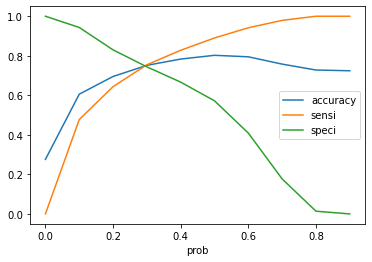

In [178]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [361]:
#From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [756]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

In [757]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,7567-ECMCM,0,0.499083,0,1,1,1,1,1,0,0,0,0,0,1
1,6771-XWBDM,1,0.372696,0,1,1,1,1,0,0,0,0,0,0,1
2,5356-KZCKT,0,0.006738,0,1,0,0,0,0,0,0,0,0,0,0
3,6140-QNRQQ,1,0.635453,1,1,1,1,1,1,1,1,0,0,0,1
4,9938-PRCVK,0,0.007533,0,1,0,0,0,0,0,0,0,0,0,0


In [758]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.final_predicted)

0.7502369668246446

In [759]:
metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.final_predicted )

array([[1150,  378],
       [ 149,  433]], dtype=int64)

In [760]:
classification_report(y_pred_final.Churn, y_pred_final.final_predicted)

'              precision    recall  f1-score   support\n\n           0       0.89      0.75      0.81      1528\n           1       0.53      0.74      0.62       582\n\n   micro avg       0.75      0.75      0.75      2110\n   macro avg       0.71      0.75      0.72      2110\nweighted avg       0.79      0.75      0.76      2110\n'